In [1]:
from qiskit                        import ( QuantumCircuit, 
                                            QuantumRegister, 
                                            ClassicalRegister, 
                                            transpile          )
from qiskit.visualization          import   plot_histogram
from qiskit.quantum_info.operators import   Operator

from qiskit_aer                    import   AerSimulator

from math                          import   sqrt 

In [2]:
# SMALL ERROR
# |0> -> a|0> + b|1> con a vicino a 1
# |1> -> c|1> - d|0> con c vicino a 1
small_error = Operator([ 
                     [ 1/sqrt(100/99), 1/sqrt(100/1)], 
                     [1/sqrt(100/1), -1/sqrt(100/99)]
                                                   ]).to_instruction()
small_error.label = "S"

## OLD VERSION

In [3]:
qubit = QuantumRegister(9,'qubit')
bit = ClassicalRegister(1,'bit')  

In [4]:
# PRE-ERROR CIRCUIT
pre_error_circuit = QuantumCircuit(qubit, bit)

# CNOT
pre_error_circuit.cx(qubit[0], qubit[3]);  pre_error_circuit.cx(qubit[0], qubit[6])

# HADAMARD
pre_error_circuit.h(qubit[0]);  pre_error_circuit.h(qubit[3]);  pre_error_circuit.h(qubit[6])

# CNOT
pre_error_circuit.cx(qubit[0], qubit[1]);  pre_error_circuit.cx(qubit[3], qubit[4]);  pre_error_circuit.cx(qubit[6], qubit[7])
pre_error_circuit.cx(qubit[0], qubit[2]);  pre_error_circuit.cx(qubit[3], qubit[5]);  pre_error_circuit.cx(qubit[6], qubit[8])

pre_error_circuit.barrier() ##################################################################################

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=9, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(9, 'qubit'), 0), Qubit(QuantumRegister(9, 'qubit'), 1), Qubit(QuantumRegister(9, 'qubit'), 2), Qubit(QuantumRegister(9, 'qubit'), 3), Qubit(QuantumRegister(9, 'qubit'), 4), Qubit(QuantumRegister(9, 'qubit'), 5), Qubit(QuantumRegister(9, 'qubit'), 6), Qubit(QuantumRegister(9, 'qubit'), 7), Qubit(QuantumRegister(9, 'qubit'), 8)), clbits=())

In [5]:
# POST-ERROR CIRCUIT
pst_error_circuit = QuantumCircuit(qubit, bit)

pst_error_circuit.barrier() ##################################################################################
# CNOT
pst_error_circuit.cx(qubit[0], qubit[1]);  pst_error_circuit.cx(qubit[3], qubit[4]);  pst_error_circuit.cx(qubit[6], qubit[7])
pst_error_circuit.cx(qubit[0], qubit[2]);  pst_error_circuit.cx(qubit[3], qubit[5]);  pst_error_circuit.cx(qubit[6], qubit[8])

# TOFFOLI
pst_error_circuit.ccx(qubit[2], qubit[1], qubit[0]);  pst_error_circuit.ccx(qubit[5], qubit[4], qubit[3]);  pst_error_circuit.ccx(qubit[8], qubit[7], qubit[6])

# HADAMARD
pst_error_circuit.h(qubit[0]);  pst_error_circuit.h(qubit[3]);  pst_error_circuit.h(qubit[6])

# CNOT
pst_error_circuit.cx(qubit[0], qubit[3]);  pst_error_circuit.cx(qubit[0], qubit[6])

# TOFFOLI
pst_error_circuit.ccx(qubit[6], qubit[3], qubit[0]); 

pst_error_circuit.barrier() ##################################################################################

pst_error_circuit.measure(qubit[0], bit[0])

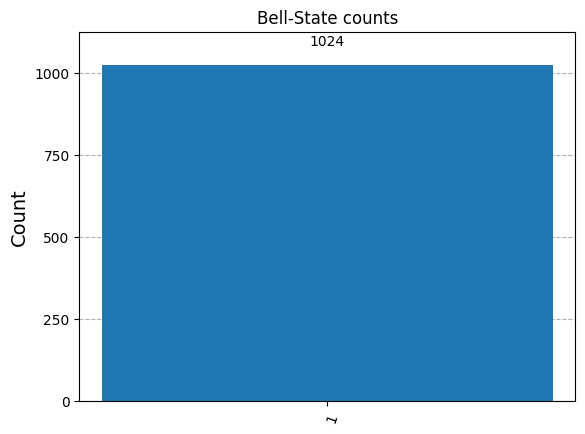

In [6]:
# ERROR CIRCUIT
the_error_circuit = QuantumCircuit(qubit, bit)

# BIT FLIP
#the_error_circuit.x(qubit[0])
#the_error_circuit.x(qubit[3])
#the_error_circuit.x(qubit[6])

# PHASE FLIP
the_error_circuit.z(qubit[0])
the_error_circuit.z(qubit[4])



# SMALL ERROR
#the_error_circuit.append(small_error, [0])

complete_circuit = pre_error_circuit.compose(the_error_circuit.compose(pst_error_circuit))

# Transpile for simulator
simulator = AerSimulator()
complete_circuit = transpile(complete_circuit, simulator)

# Run and get counts
result = simulator.run(complete_circuit, shots="1024").result()
counts = result.get_counts(complete_circuit)
plot_histogram(counts, title='Bell-State counts')

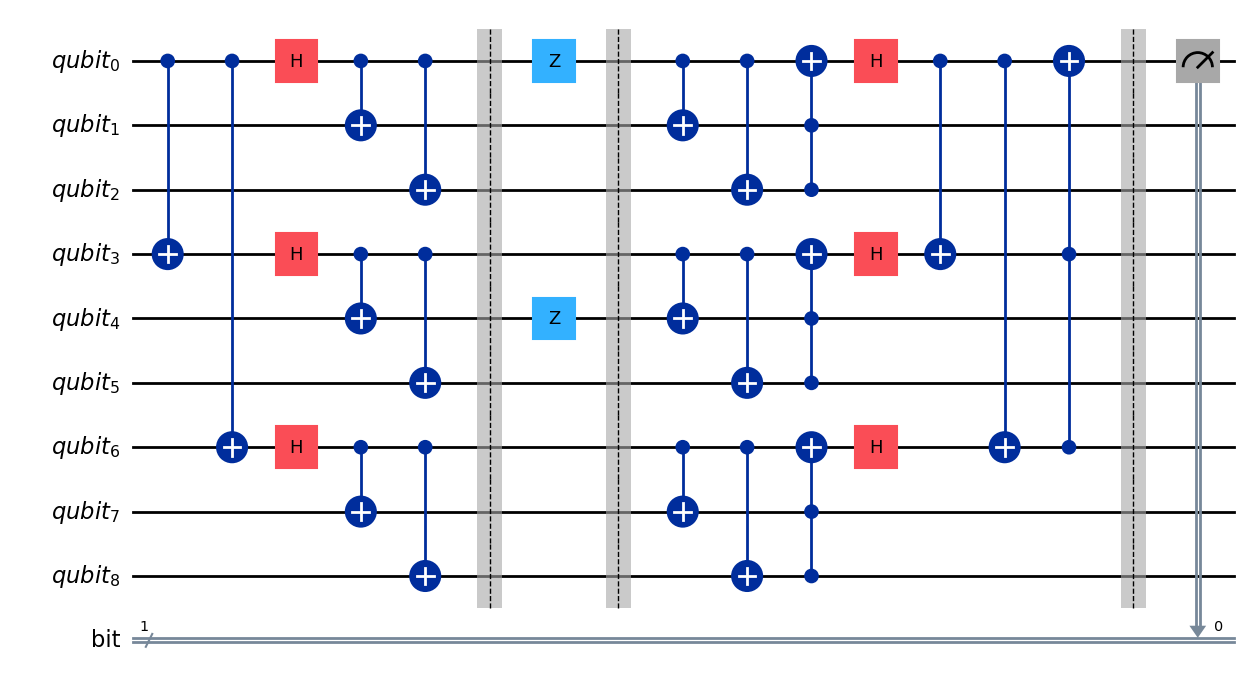

In [7]:
complete_circuit = pre_error_circuit.compose(the_error_circuit.compose(pst_error_circuit))

# Draw the circuit
complete_circuit.draw("mpl", filename='_res/shor_protocol.png')

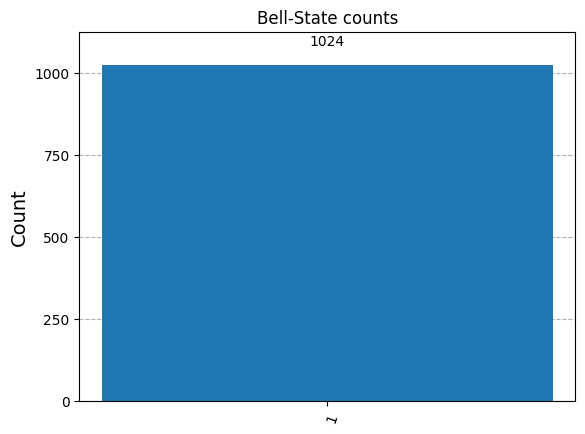

In [8]:
# Transpile for simulator
simulator = AerSimulator()
complete_circuit = transpile(complete_circuit, simulator)

# Run and get counts
result = simulator.run(complete_circuit, shots="1024").result()
counts = result.get_counts(complete_circuit)
plot_histogram(counts, title='Bell-State counts')

## Versione con pezzi separati:

In [9]:
qubit   = QuantumRegister(  9, 'qubit')
bit     = ClassicalRegister(1, 'bit')

In [10]:
# PHASE FLIP ENCODING

phase_flip_enc = QuantumCircuit(qubit, bit)

# ENCODE 1 OR 0
# phase_flip_enc.x(qubit[0])
# phase_flip_enc.barrier() ##################################################################################

# CNOT
phase_flip_enc.cx(qubit[0], qubit[3]);  phase_flip_enc.cx(qubit[0], qubit[6])

# HADAMARD
phase_flip_enc.h(qubit[0]);  phase_flip_enc.h(qubit[3]);  phase_flip_enc.h(qubit[6])

phase_flip_enc.barrier() ##################################################################################

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=9, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(9, 'qubit'), 0), Qubit(QuantumRegister(9, 'qubit'), 1), Qubit(QuantumRegister(9, 'qubit'), 2), Qubit(QuantumRegister(9, 'qubit'), 3), Qubit(QuantumRegister(9, 'qubit'), 4), Qubit(QuantumRegister(9, 'qubit'), 5), Qubit(QuantumRegister(9, 'qubit'), 6), Qubit(QuantumRegister(9, 'qubit'), 7), Qubit(QuantumRegister(9, 'qubit'), 8)), clbits=())

In [11]:
# BIT FLIP ENCODING

bit_flip_enc = QuantumCircuit(qubit, bit)

# CNOT
bit_flip_enc.cx(qubit[0], qubit[1]);  bit_flip_enc.cx(qubit[3], qubit[4]);  bit_flip_enc.cx(qubit[6], qubit[7])
bit_flip_enc.cx(qubit[0], qubit[2]);  bit_flip_enc.cx(qubit[3], qubit[5]);  bit_flip_enc.cx(qubit[6], qubit[8])

bit_flip_enc.barrier() ##################################################################################

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=9, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(9, 'qubit'), 0), Qubit(QuantumRegister(9, 'qubit'), 1), Qubit(QuantumRegister(9, 'qubit'), 2), Qubit(QuantumRegister(9, 'qubit'), 3), Qubit(QuantumRegister(9, 'qubit'), 4), Qubit(QuantumRegister(9, 'qubit'), 5), Qubit(QuantumRegister(9, 'qubit'), 6), Qubit(QuantumRegister(9, 'qubit'), 7), Qubit(QuantumRegister(9, 'qubit'), 8)), clbits=())

In [12]:
# BIT FLIP DECODING

bit_flip_dec = QuantumCircuit(qubit, bit)

bit_flip_dec.barrier() ##################################################################################
# CNOT
bit_flip_dec.cx(qubit[0], qubit[2]);  bit_flip_dec.cx(qubit[3], qubit[5]);  bit_flip_dec.cx(qubit[6], qubit[8])
bit_flip_dec.cx(qubit[0], qubit[1]);  bit_flip_dec.cx(qubit[3], qubit[4]);  bit_flip_dec.cx(qubit[6], qubit[7])

# TOFFOLI
bit_flip_dec.ccx(qubit[2], qubit[1], qubit[0]);  bit_flip_dec.ccx(qubit[5], qubit[4], qubit[3]);  bit_flip_dec.ccx(qubit[8], qubit[7], qubit[6])

bit_flip_dec.barrier() ##################################################################################



CircuitInstruction(operation=Instruction(name='barrier', num_qubits=9, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(9, 'qubit'), 0), Qubit(QuantumRegister(9, 'qubit'), 1), Qubit(QuantumRegister(9, 'qubit'), 2), Qubit(QuantumRegister(9, 'qubit'), 3), Qubit(QuantumRegister(9, 'qubit'), 4), Qubit(QuantumRegister(9, 'qubit'), 5), Qubit(QuantumRegister(9, 'qubit'), 6), Qubit(QuantumRegister(9, 'qubit'), 7), Qubit(QuantumRegister(9, 'qubit'), 8)), clbits=())

In [13]:
# PHASE FLIP DECODING

phase_flip_dec = QuantumCircuit(qubit, bit)

# HADAMARD
phase_flip_dec.h(qubit[0]);  phase_flip_dec.h(qubit[3]);  phase_flip_dec.h(qubit[6])

# CNOT
phase_flip_dec.cx(qubit[0], qubit[6]); phase_flip_dec.cx(qubit[0], qubit[3]); 

# TOFFOLI
phase_flip_dec.ccx(qubit[6], qubit[3], qubit[0]); 

phase_flip_dec.barrier() ##################################################################################

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=9, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(9, 'qubit'), 0), Qubit(QuantumRegister(9, 'qubit'), 1), Qubit(QuantumRegister(9, 'qubit'), 2), Qubit(QuantumRegister(9, 'qubit'), 3), Qubit(QuantumRegister(9, 'qubit'), 4), Qubit(QuantumRegister(9, 'qubit'), 5), Qubit(QuantumRegister(9, 'qubit'), 6), Qubit(QuantumRegister(9, 'qubit'), 7), Qubit(QuantumRegister(9, 'qubit'), 8)), clbits=())

In [14]:
# MEASURE

measure = QuantumCircuit(qubit, bit)

measure.measure(qubit[0], bit[0])

In [24]:
# ERROR

# ERROR CIRCUIT
error = QuantumCircuit(qubit, bit)

error.x(qubit[4])
error.x(qubit[5])
error.x(qubit[7])
error.x(qubit[8])



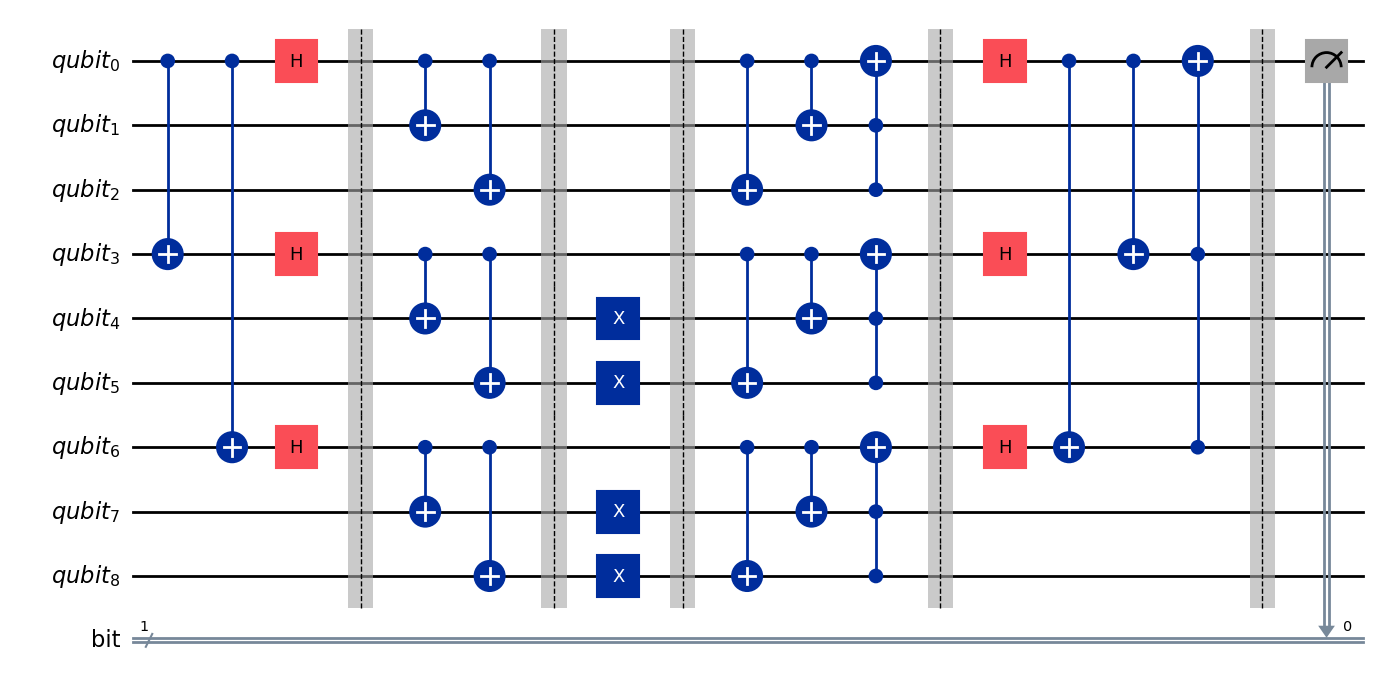

In [25]:
# UNITE CIRCUITS

complete_circuit = phase_flip_enc.compose(bit_flip_enc.compose(error.compose(bit_flip_dec.compose(phase_flip_dec.compose(measure)))))
# Draw the circuit
complete_circuit.draw("mpl", filename='_res/shor_protocol.png')

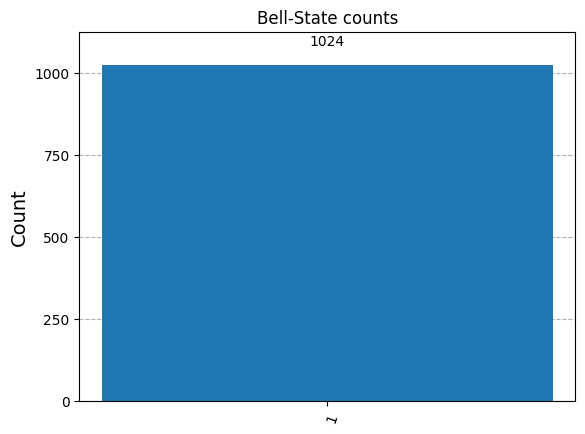

In [23]:
# Transpile for simulator
simulator = AerSimulator()
complete_circuit = transpile(complete_circuit, simulator)

# Run and get counts
result = simulator.run(complete_circuit, shots="1024").result()
counts = result.get_counts(complete_circuit)
plot_histogram(counts, title='Bell-State counts')